<a href="https://colab.research.google.com/github/Rachael-Osoro/phase_3_project/blob/main/H1N1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


# **H1N1 VACCINATION ANALYSIS**
## Problem Statement

There seems to be an overall hesitancy in vaccine uptake which is major threat to reduction of vaccine preventable diseases. Reasons for hesitancy vary from safety and effectiveness of vaccines, mistrust, socio-economic characteristics, vaccine development, perceived risk of disease, lack of information about vaccine, personal beliefs, perceived benefit etc. To assess seasonal flu and H1N1 vaccine uptake, in late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. The questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission.  


## Business Understanding
The CDC is looking for a better understanding of how these characteristics are associated with personal vaccination patterns in order to provide guidance for future public health efforts.

## Data Understanding
Data obtained from National Centre for Health Statistics through a survey conducted between October 2009 and June 20.
Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey and there are two target variables. 

## Project Goal
The aim of this project is to predict the vaccination status of person based on their response to survey questions. The results will be utilized by public health departments to ramp up campaigns, mass vaccination, conduct health education on those assigned unvaccinated in order to promote vaccination against influenza.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer



In [4]:
# loading dataset
features = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/training_set_features.csv')
training_set_labels = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/training_set_labels.csv')

In [5]:
# displaying dataset
display(features.shape)
display(features.head())

(26707, 36)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
# checking for duplicated records
features.duplicated().sum()

0

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The training set features are 36 columns and 26707 records of all participants. The dataset is consistent

## Target Variables
Onto our target variables:

* ```h1n1_vaccine``` - Whether respondent received H1N1 flu vaccine.

* ```seasonal_vaccine``` - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.

In [8]:
# shape and info of target variable
display(training_set_labels.shape)
display(training_set_labels.head())

(26707, 3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
# look at the info and null values for the target variables

display(training_set_labels.info())
print('\n')
display(training_set_labels.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


None

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

The target variables have the right datatypes and no null values. Great! we will do a some exploratory analysis.

# **DATA EXPLORATION**

## 1.1 H1N1 (Swine flu) Vaccination

In [10]:
# explore the number of people vaccinated vs those not vaccinated
print('H1N1 vaccination count: \n',
      training_set_labels['h1n1_vaccine'].value_counts())

print('H1N1 vaccination count normalized: \n',
      training_set_labels['h1n1_vaccine'].value_counts(normalize=True))



H1N1 vaccination count: 
 0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
H1N1 vaccination count normalized: 
 0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64


There seams to be a class imbalance between those vaccinated against swine flu, class 0, with about 79% compared to 21% of class 1. Graphically displayed below:

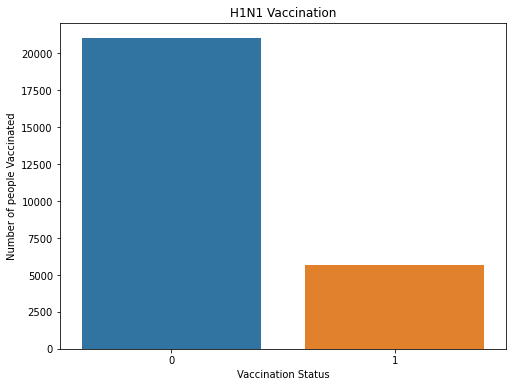

In [11]:
# H1N1 vaccine distribution graphically
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=training_set_labels, x='h1n1_vaccine');
ax.set_title('H1N1 Vaccination')
ax.set_ylabel('Number of people Vaccinated')
ax.set_xlabel('Vaccination Status');

## 1.2 Seasonal Flu Vaccination

In [12]:
print('H1N1 vaccination count: \n',
      training_set_labels['seasonal_vaccine'].value_counts())

print('H1N1 vaccination count normalized: \n',
      training_set_labels['seasonal_vaccine'].value_counts(normalize=True))


H1N1 vaccination count: 
 0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
H1N1 vaccination count normalized: 
 0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


Seasonal flu vaccination has a fairly well balance between those not vaccinated, class 0, at about 53% and class 1 is about 47%. Graphically illustrated below:

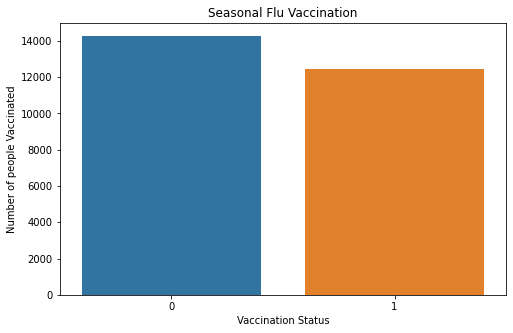

In [13]:
# looking at seasonal_vaccine distribution graphically
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=training_set_labels, x='seasonal_vaccine')
ax.set_title('Seasonal Flu Vaccination')
ax.set_ylabel('Number of people Vaccinated')
ax.set_xlabel('Vaccination Status');

In [14]:
# let's display a cross tabulation of the two vaccines 
# to get a feel of H1N1 vaccine uptake compared to seasonal flu vaccine

cross_tab = pd.crosstab(training_set_labels.iloc[:,1],
                        training_set_labels.iloc[:,2],
                        normalize=True)

cross_tab

seasonal_vaccine,0,1
h1n1_vaccine,,
0,0.497810,0.289737
1,0.036582,0.175871


About half of the participants did not receive any of the two vaccines. 29% were vaccinated again seasonal flu but not vaccinated against H1N1. 4% people received H1N1 vaccined but not the seasonal flu vaccine. Only 17% received both vaccines. Overall, poor vaccine uptake but people were more receptive of seasonal flu vaccine compared to H1N1. Could be due to a couple of resons: seasonal flu is perennial, it's vaccine is readily availbale. H1N1 flu was a pandemic that resolved, people did not feel the need to be vaccinated once it was over. Maybe, H1N1 vaccines were not readily available for uptake.

## 2 Exploring Features of the dataset

The dataset contains 36 columns. The first column ```respondent_id``` is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

1. ```h1n1_concern``` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

2. ```h1n1_knowledge``` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

3. ```behavioral_antiviral_meds``` - Has taken antiviral medications. (binary)
4. ```behavioral_avoidance``` - Has avoided close contact with others with flu-like symptoms. (binary)

5. ```behavioral_face_mask``` - Has bought a face mask. (binary)

6. ```behavioral_wash_hands``` - Has frequently washed hands or used hand sanitizer. (binary)
7. ```behavioral_large_gatherings``` - Has reduced time at large gatherings. (binary)
8. ```behavioral_outside_home``` - Has reduced contact with people outside of own household. (binary)
9. ```behavioral_touch_face``` - Has avoided touching eyes, nose, or mouth. (binary)
10. ```doctor_recc_h1n1``` - H1N1 flu vaccine was recommended by doctor. (binary)
11. ``doctor_recc_seasonal``` - Seasonal flu vaccine was recommended by doctor. (binary)
12. ```chronic_med_condition``` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
13. ```child_under_6_months``` - Has regular close contact with a child under the age of six months. (binary)
14. ```health_worker``` - Is a healthcare worker. (binary)
15. ```health_insurance``` - Has health insurance. (binary)
16. ```opinion_h1n1_vacc_effective``` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
17. ```opinion_h1n1_risk``` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
18. ```opinion_h1n1_sick_from_vacc``` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
19. ```opinion_seas_vacc_effective``` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
20. ```opinion_seas_risk``` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
21. ```opinion_seas_sick_from_vacc``` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
22. ```age_group``` - Age group of respondent.
23. ```education``` - Self-reported education level.
24. ```race``` - Race of respondent.
25. ```sex``` - Sex of respondent.
26. ```income_poverty``` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
27. ```marital_status``` - Marital status of respondent.
28. ```rent_or_own``` - Housing situation of respondent.
29. ```employment_status``` - Employment status of respondent.
30. ```hhs_geo_region``` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
31. ```census_msa``` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
32. ```household_adults``` - Number of other adults in household, top-coded to 3.
33. ```household_children``` - Number of children in household, top-coded to 3.
34. ```employment_industry``` - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.
35. ```employment_occupation``` - Type of occupation of respondent. Values are represented as short random character strings.


### Null Values

In [15]:
# percentage of missing values
missing = features.isna().sum()*100/ len(features)
missing = pd.DataFrame({'column_name': features.columns,
                        'percent_missing': missing})
                       
missing[missing['percent_missing']>20]

,column_name,percent_missing
health_insurance,health_insurance,45.957989
employment_industry,employment_industry,49.912008
employment_occupation,employment_occupation,50.436215


In [16]:
# drop columns with more than 20% null values
to_drop = features[['health_insurance', 'employment_industry', 'employment_occupation']]

# drop columns
features.drop(columns=to_drop, axis=1, inplace=True)
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [17]:
features.isna().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

## Dealing with Numerical Variables
Start with numeric columns. Replace null values with the median of each column.

In [18]:
pd.set_option('display.max_columns', 40)
numeric = features.dtypes != 'object'
numeric_cols = features.columns[numeric]
numeric_df = features[numeric_cols]
numeric_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [19]:
# using sklearn SimpleImputer with strategy=median
# replace null values with median
# instantiating SimpleImputer 

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

#fit_transform SimpleImputer, convert results to dataframe
imputed_num = pd.DataFrame(imp_median.fit_transform(numeric_df), 
                           index=numeric_df.index, 
                           columns=numeric_df.columns)

imputed_num.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

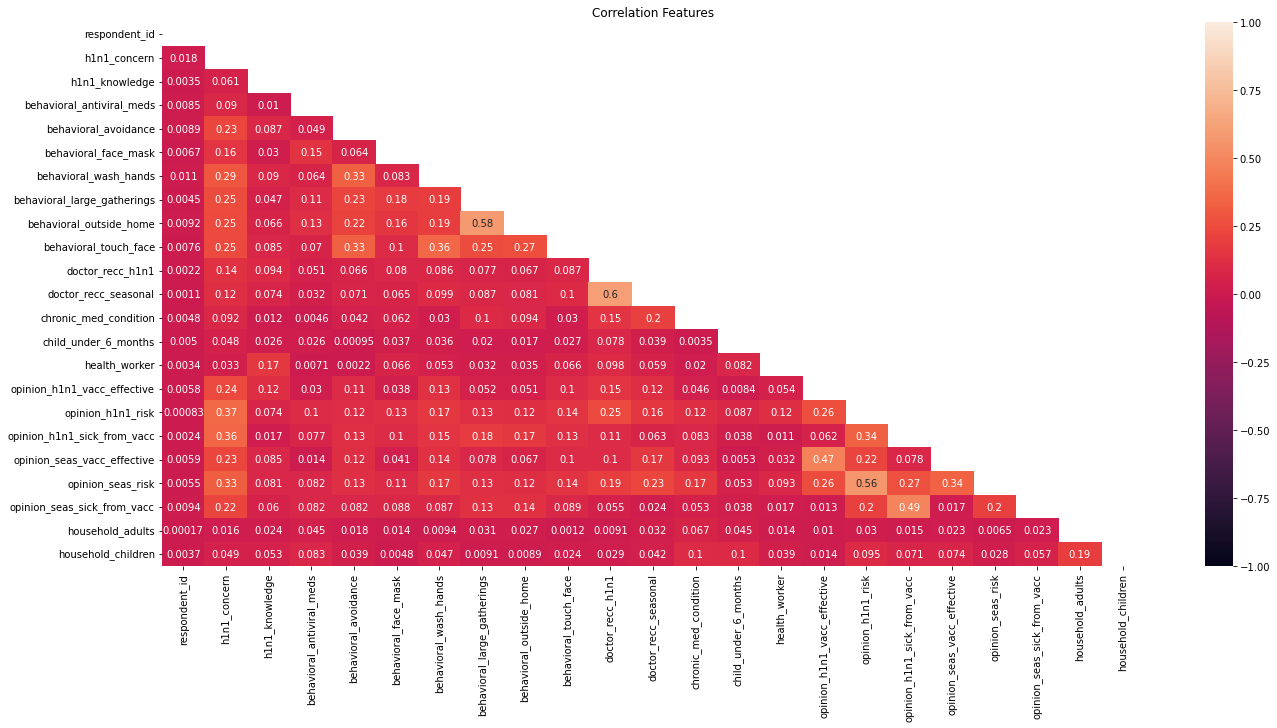

In [20]:
plt.figure(figsize=(22,10))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(imputed_num.corr().abs(), dtype=bool))

# generate heatmap
sns.heatmap(imputed_num.corr().abs(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Features')
plt.show()

The features do not have high correlation, except for the following with moderate correlation.
```opinion_h1n1_risk``` and ```opinion_seas_risk``` 0.56,
```doctor_recc_h1n1``` and ```doctor_recc_seasonal``` 0.6,
```behavior_outside_home``` and ```behavioral_large_gatherings``` 0.58. which makes sense becasue they provide similar information. A doctor recommending seasonal flu vaccine is likely to recommend h1n1 vaccine.

## Dealing with non numeric features

In [21]:
# select columns with 'object datatypes

cats= features.dtypes == 'object'
cat_vars = features[features.columns[cats]]

cat_vars

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [22]:
cat_vars.isna().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

In [23]:
# replace missing values in the ordinal columns

categ = cat_vars.copy()
categ= categ.fillna({'education': 'unknown', 
                           'income_poverty': '<= $75,000, Above Poverty', #mode/median in dataset
                           'marital_status': 'unknown', 
                           'rent_or_own': 'unknown', 
                           'employment_status': 'unknown'})
categ.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

In [24]:
plot_data = pd.concat([categ, training_set_labels.iloc[:, 1:]], axis=1)
plot_data.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,h1n1_vaccine,seasonal_vaccine
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,1
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,1
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0


<Figure size 2000x1600 with 0 Axes>

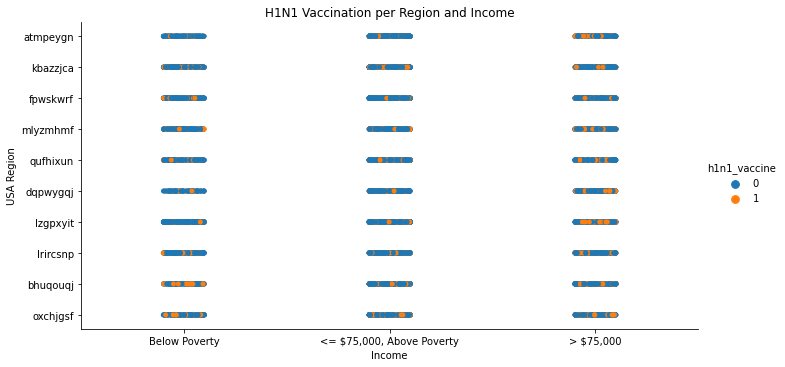

In [48]:
plt.figure(figsize=(10,8), dpi=200)

# plot catplot 
sns.catplot(x='income_poverty', y='hhs_geo_region', hue='h1n1_vaccine', data=plot_data, aspect=2)
plt.title('H1N1 Vaccination per Region and Income')
plt.ylabel('USA Region')
plt.xlabel('Income')
plt.show();

Generally poor vaccine uptake across all tax brackets and regioons. 
In region atmpeygn and lzgpxyit more people who earn above $ 75000 were vaccinated compared to less than $ 75000. as opposed to bhuqouqj and oxchjgsf where those below poverty line received more vaccinations. these regions might have had free vaccinations due to high prevalence of h1n1 or donations.
The 'middle class' is the least vaccinated against h1n1

In [50]:
# join the numerical and non-numeric dataframes into one
pd.set_option('display.max_columns', 40)
df = pd.concat([imputed_num, categ], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


For plotting 

In [51]:
plot2 = pd.concat([imputed_num, training_set_labels.iloc[:, 1:]], axis=1)
plot2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0
26703,26703.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0
26704,26704.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1
26705,26705.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0


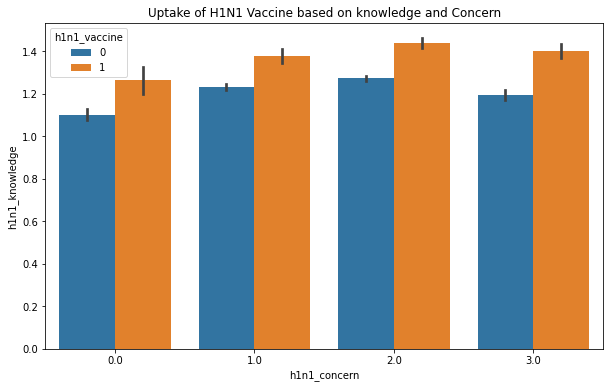

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="h1n1_concern", y="h1n1_knowledge", hue="h1n1_vaccine", data=plot2)
ax.set_title('Uptake of H1N1 Vaccine based on knowledge and Concern');


Those who had more knowledge of H1N1 influenza seem to have been vaccinated more.knowledge is directly prorportional to vaccination.

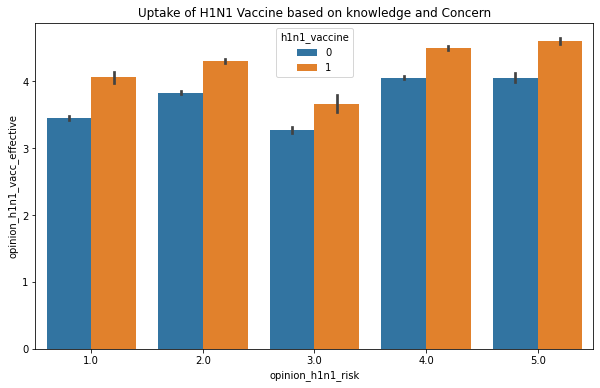

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="opinion_h1n1_risk", y="opinion_h1n1_vacc_effective", hue="h1n1_vaccine", data=plot2)
ax.set_title('Uptake of H1N1 Vaccine based on knowledge and Concern');


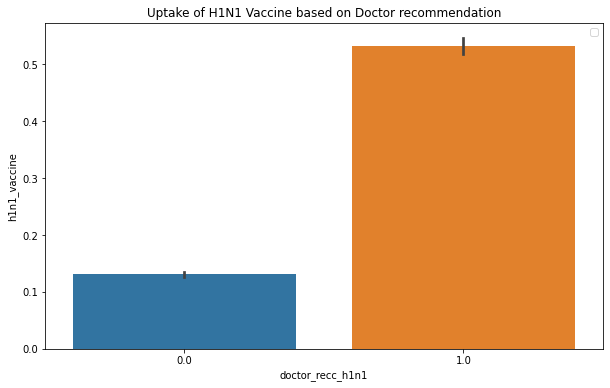

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="doctor_recc_h1n1", y="h1n1_vaccine", data=plot2)
ax.set_title('Uptake of H1N1 Vaccine based on Doctor recommendation');


More people were vaccinated following doctor's recommendation.

# **2. Preprocessing**
Using ordinal encoder to encode ordinal datapoints into numerical categories

In [76]:
non_numeric =df[['age_group', 'education', 'race',	'sex',	'income_poverty',	'marital_status',	'rent_or_own', 'employment_status',	'hhs_geo_region',	'census_msa']]

# convert to category datatype

num = non_numeric.copy()
num = num.iloc[:, 0:9].astype('category')

In [77]:
from sklearn import preprocessing
for col in num.columns:
#from sklearn import preprocessing
  le = preprocessing.OrdinalEncoder()
  num1 = le.fit_transform(num)
num1 = pd.DataFrame(data=num1, columns=num.columns, index=num.index)
num1

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region
0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,8.0
1,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0
2,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,9.0
3,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,5.0
4,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...
26702,4.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,9.0
26703,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,6.0
26704,3.0,3.0,3.0,0.0,0.0,1.0,0.0,3.0,6.0
26705,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0


In [78]:
clean_df = pd.concat([imputed_num, num1], axis=1)
clean_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,8.0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,9.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,5.0
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0


In [79]:
clean_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment

In [80]:
clean_df.duplicated().sum()

0

In [ ]:
clean_df.to_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/clean_df')